In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import keras
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import matplotlib.pyplot as plt
from tensorflow.keras import initializers

## Import data 

In [46]:
df_southwest = pd.read_excel(r'/Users/dilianaserafimova/Desktop/df_southwest_clean.xlsx')

In [47]:
df_southwest = df_southwest.set_index(['date'])

In [48]:
X = df_southwest[['revenue', 'seat_miles', 'load_factor', 'flights']]

In [49]:
y = df_southwest['pax_count'].values

## Train & test split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

## Normalize the data

In [51]:
scaler = MinMaxScaler()

In [52]:
X_train = scaler.fit_transform(X_train)

In [53]:
X_test = scaler.transform(X_test)

## Creating the model 

In [87]:
model = Sequential()

model.add(Dense(4, activation='relu', 
                kernel_initializer=initializers.RandomNormal(stddev=0.01),
                bias_initializer=initializers.Zeros()
               ))
model.add(Dense(8, activation='relu'))
#model.add(Dense(6, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='relu'))
#model.add(Dense(2, activation='relu'))
model.add(Dense(units=1,activation='relu'))

In [88]:
opt = keras.optimizers.Adam(learning_rate=0.2, beta_1=0.5, beta_2=0.999)

model.compile(loss = 'mean_absolute_error', optimizer= opt)

## Fit the model 

In [89]:
model.fit(X_train, y_train, epochs = 50, validation_data=(X_test, y_test))

Epoch 1/50
6/6 [==============================] - 1s 46ms/step - loss: 9800520.0000 - val_loss: 9754021.0000
Epoch 2/50
6/6 [==============================] - 0s 14ms/step - loss: 9789975.0000 - val_loss: 9671867.0000
Epoch 3/50
6/6 [==============================] - 0s 14ms/step - loss: 9515614.0000 - val_loss: 8544268.0000
Epoch 4/50
6/6 [==============================] - 0s 13ms/step - loss: 7045416.0000 - val_loss: 1535148.8750
Epoch 5/50
6/6 [==============================] - 0s 11ms/step - loss: 1014512.1875 - val_loss: 710032.5625
Epoch 6/50
6/6 [==============================] - 0s 12ms/step - loss: 566632.3125 - val_loss: 636921.7500
Epoch 7/50
6/6 [==============================] - 0s 12ms/step - loss: 440486.3750 - val_loss: 1140753.5000
Epoch 8/50
6/6 [==============================] - 0s 15ms/step - loss: 637336.3750 - val_loss: 453509.1250
Epoch 9/50
6/6 [==============================] - 0s 14ms/step - loss: 463015.4062 - val_loss: 540205.8750
Epoch 10/50
6/6 [==========

In [90]:
losses = pd.DataFrame(model.history.history)

In [91]:
losses.head()

,loss,val_loss
0,9.800520e+06,9.754021e+06
1,9.789975e+06,9.671867e+06
2,9.515614e+06,8.544268e+06
3,7.045416e+06,1.535149e+06
4,1.014512e+06,7.100326e+05


<AxesSubplot:>

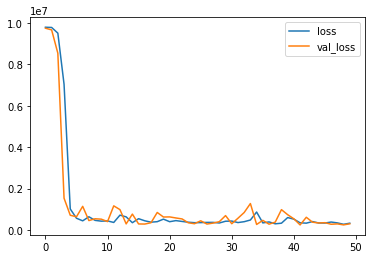

In [93]:
losses.plot()

In [94]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [95]:
model.summary()
for layer in model.layers:
    print("Layer: ", layer.name) # print layer name
    print("  --Kernels (Weights): ", layer.get_weights()) # weights
    print("  --Biases: ", layer.get_weights()) # biases
    

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 4)                 20        
                                                                 
 dense_50 (Dense)            (None, 8)                 40        
                                                                 
 dense_51 (Dense)            (None, 5)                 45        
                                                                 
 dense_52 (Dense)            (None, 3)                 18        
                                                                 
 dense_53 (Dense)            (None, 1)                 4         
                                                                 
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________
Layer:  dense_49
  --Kernels (Weights):  [array([[-2.256

In [96]:
testScore = math.sqrt(mean_squared_error(y_test, testPredict))
print("Test Score: %.2f RMSE" % (testScore))

Test Score: 373840.07 RMSE


In [97]:
trainScore = math.sqrt(mean_squared_error(y_train, trainPredict))
print("Train Score: %.2f RMSE" % (testScore))

Train Score: 373840.07 RMSE


In [98]:
def plot_delta(actual, predictions):
    title = 'Passanger Predictions Store '
    act = plt.plot(actual, color='blue', label='Actual')
    pred = plt.plot(predictions, color='orange', label='Predictions')
    plt.xlabel("Date")
    plt.ylabel("Paxe")
    plt.legend(loc='best')
    plt.title(title)
    plt.show()

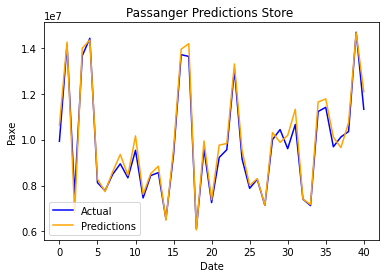

In [99]:
plot_delta(y_test, testPredict)